<a href="https://colab.research.google.com/github/Nishiket-singh/EECS4404/blob/main/Fake_News_Classification_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 27.9 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import (
    Model,
    Sequential
)
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    Input
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from tensorflow.keras.optimizers import Adam
from transformers import (
    TFBertModel,
    AutoTokenizer,
)
from tensorflow.keras import regularizers
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import tensorflow as tf
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Dataset Loading. The final dataset is a combination of the two datasets

In [ ]:
dataset_1 = '/content/drive/My Drive/ML_Project/data_another/Fake.csv'
dataset_2 = '/content/drive/My Drive/ML_Project/data_another/True.csv'
dataset_3 = '/content/drive/My Drive/ML_Project/data/train.csv'

In [ ]:
fake_dataset = pd.read_csv(dataset_1)
true_dataset = pd.read_csv(dataset_2)
another_dataset = pd.read_csv(dataset_3)

In [ ]:
fake_dataset

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Fake is labelled 1. True is labelled 0. This makes it consistent with the data loaded into the "another_database"

In [ ]:
fake_dataset["label"] = 1
true_dataset["label"] = 0

In [ ]:
true_dataset

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
fake_dataset

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [ ]:
final_dataset= pd.concat([fake_dataset,true_dataset,another_dataset])

In [ ]:
final_dataset

,title,text,subject,date,label,id,author
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,NaN,NaN
...,...,...,...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,NaN,NaN,0,20795.0,Jerome Hudson
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,NaN,NaN,0,20796.0,Benjamin Hoffman
20797,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,NaN,NaN,0,20797.0,Michael J. de la Merced and Rachel Abrams
20798,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",NaN,NaN,1,20798.0,Alex Ansary


In [ ]:
final_dataset.isnull().sum()

title        558
text          39
subject    20800
date       20800
label          0
id         44898
author     46855
dtype: int64

Text-Preprocessing

We're removing all columns except for text and label

In [ ]:
column_n = ['id','author','title','text','subject','date','label']
remove_c = ['title','subject','date','id','author']

In [ ]:
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.stem.porter import PorterStemmer
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# remove unused columns
def remove_unused_c(df, column_n=remove_c):
    df = df.drop(column_n, axis=1)
    return df

def clean_dataset(df):
  # remove unused column
    df = remove_unused_c(df,remove_c)    
    #reomve null value
    df = df.dropna()
    
    return df

def clean_text(text):
    text = str(text).lower().strip()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [ ]:
final_dataset_preprocessed = clean_dataset(final_dataset)

In [ ]:
final_dataset_preprocessed['text'] = final_dataset_preprocessed.text.apply(clean_text)

In [ ]:
final_dataset_preprocessed

,text,label
0,donald trump just couldn t wish all americans ...,1
1,house intelligence committee chairman devin nu...,1
2,on friday it was revealed that former milwauke...,1
3,on christmas day donald trump announced that h...,1
4,pope francis used his annual christmas day mes...,1
...,...,...
20795,rapper t i unloaded on black celebrities who m...,0
20796,when the green bay packers lost to the washing...,0
20797,the macy’s of today grew from the union of sev...,0
20798,nato russia to hold parallel exercises in balk...,1


<Axes: xlabel='label', ylabel='count'>

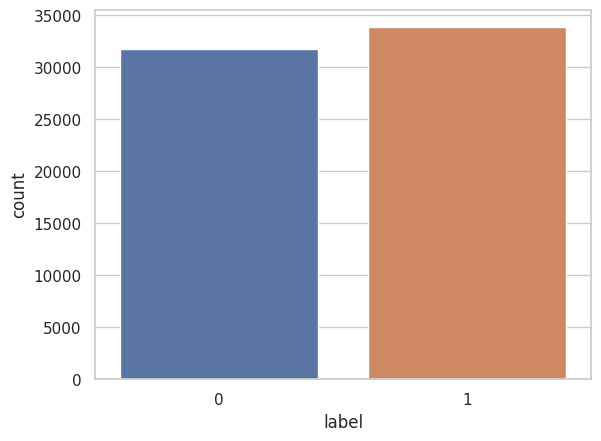

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_dataset_preprocessed["label"])

In [ ]:
data_text=final_dataset_preprocessed["text"]
data_label=final_dataset_preprocessed["label"]

Input Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data_text,
    data_label,
    stratify = data_label,
    shuffle=True,
    test_size = 0.2, random_state =42
)

In [ ]:
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [ ]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [ ]:
maxlen=100
dropout_rate=0.2

Model Training

In [ ]:
input_ids=Input(shape=(maxlen,),dtype=tf.int32,name='ids')
input_mask=Input(shape=(maxlen,),dtype=tf.int32,name='masks')
bert_layer=bert_model([input_ids,input_mask])[1]
x=Dropout(0.2)(bert_layer)
x=Dense(64,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(1,activation="sigmoid")(x)

model = Model(inputs=[input_ids, input_mask], outputs=x)
model.layers[2].trainable = True

In [ ]:
optimizer = Adam(
    learning_rate=1e-05,
)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ids (InputLayer)               [(None, 100)]        0           []                               
                                                                                                  
 masks (InputLayer)             [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['ids[0][0]',                    
                                thPoolingAndCrossAt               'masks[0][0]']                  
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    verbose=False,
    patience=3,
    baseline=0.4,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    x = {'ids':X_train_token['input_ids'],'masks':X_train_token['attention_mask']},
    y = Y_train,
    epochs=3,
    validation_split = 0.25,
    batch_size = 32,
    callbacks=[
        EarlyStopping(
            monitor='val_accuracy',
            mode='max',
            patience=3,
            verbose=False,
            restore_best_weights=True
        )
    ]
)

Epoch 1/3
1314/1314 [==============================] - 212s 126ms/step - loss: 0.0873 - accuracy: 0.9668 - val_loss: 0.0448 - val_accuracy: 0.9860
Epoch 2/3
1314/1314 [==============================] - 123s 93ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0395 - val_accuracy: 0.9878
Epoch 3/3
1314/1314 [==============================] - 119s 91ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0348 - val_accuracy: 0.9902


Model Accuracy and Loss

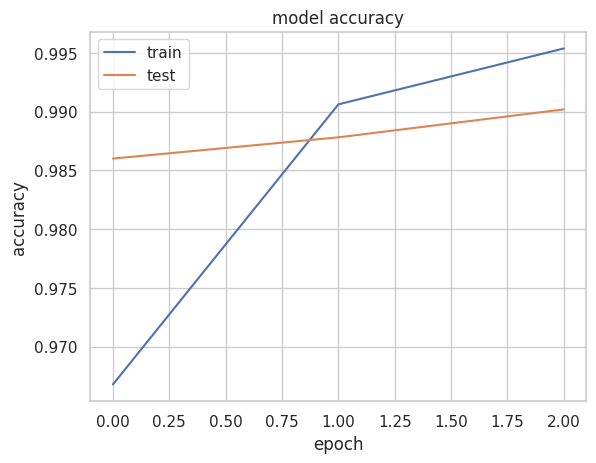

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

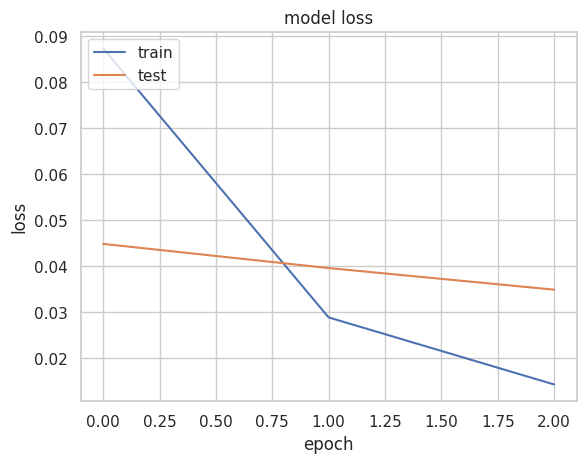

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluation on Test set now

In [ ]:
model.evaluate(
    x = {'ids':X_test_token['input_ids'],'masks':X_test_token['attention_mask']},
    y = Y_test
)

411/411 [==============================] - 14s 35ms/step - loss: 0.0432 - accuracy: 0.9883


[0.04321048781275749, 0.9883490800857544]

In [ ]:
predicted_labels = model.predict(
    { 'ids' : X_test_token['input_ids'] , 'masks' : X_test_token['attention_mask']}
)

411/411 [==============================] - 17s 34ms/step


In [ ]:
predicted_labels

array([[0.9999615 ],
       [0.99997807],
       [0.9999578 ],
       ...,
       [0.9995664 ],
       [0.9999802 ],
       [0.9999795 ]], dtype=float32)

In [ ]:
y_pred = np.where(predicted_labels >=0.5,1,0)

In [ ]:
failed_preds = np.where(y_pred == 0)

In [ ]:
failed_preds[0]

array([    3,     5,     7, ..., 13125, 13126, 13127])

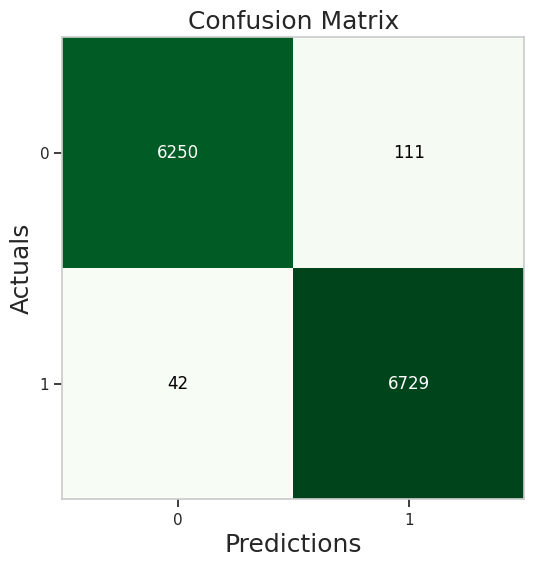

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6361
           1       0.98      0.99      0.99      6771

    accuracy                           0.99     13132
   macro avg       0.99      0.99      0.99     13132
weighted avg       0.99      0.99      0.99     13132



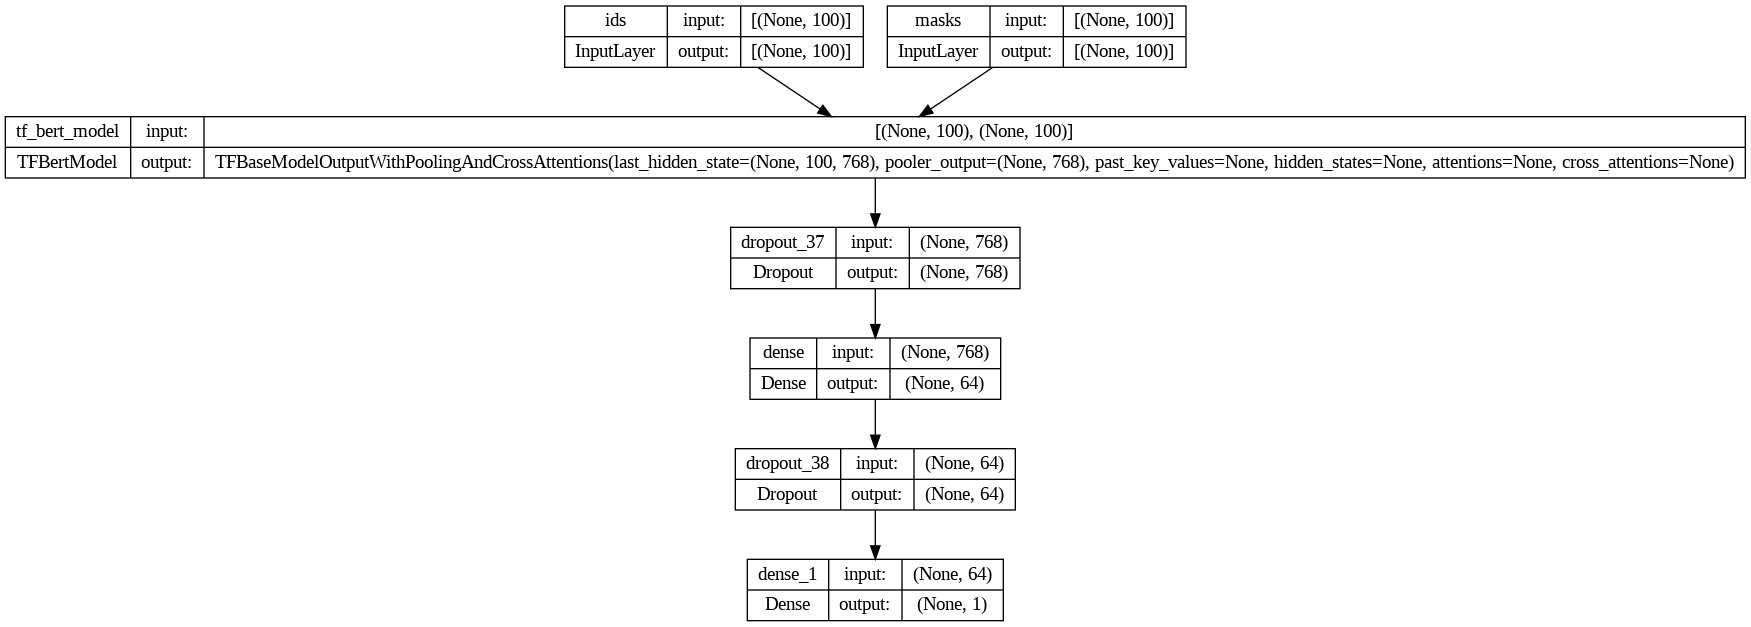

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Testing on Covid-19 News (This is to see how a model tested on covid-19 news functions)

Covid-19 dataset (Fake)

In [ ]:
fake_covid_dataset1 = '/content/drive/My Drive/ML_Project/covid_19/NewsFakeCOVID-19.csv'
fake_covid_dataset2 = '/content/drive/My Drive/ML_Project/covid_19/NewsFakeCOVID-19_5.csv'
fake_covid_dataset3 = '/content/drive/My Drive/ML_Project/covid_19/NewsFakeCOVID-19_7.csv'

In [ ]:
fake1 = pd.read_csv(fake_covid_dataset1)
fake2 = pd.read_csv(fake_covid_dataset2)
fake3 = pd.read_csv(fake_covid_dataset3)

In [ ]:
fake_covid = pd.concat([fake1,fake2,fake3])
fake_covid.columns

Index(['Unnamed: 0', 'type', 'fact_check_url', 'archieve', 'news_url',
       'news_url2', 'news_url3', 'news_url4', 'news_url5', 'title',
       'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
      dtype='object')

In [ ]:
remove_c = ['Unnamed: 0','type','fact_check_url','archieve','news_url','news_url2','news_url3','news_url4','news_url5','title','newstitle','abstract','publish_date','meta_keywords']

In [ ]:
fake_covid_preprocessed = clean_dataset(fake_covid)

In [ ]:
fake_covid_preprocessed['label'] = 1

In [ ]:
fake_covid_preprocessed

,content,label
0,you must log in to continue ..,1
1,we 've detected that javascript is disabled in...,1
3,do you want to join facebook ?.,1
4,this was important enough that i wanted to get...,1
5,governor of maine has ordered restaurant staff...,1
...,...,...
259,do you want to join facebook ?.,1
261,do you want to join facebook ?.,1
262,in the uk the director of king college london ...,1
263,see more of viviane dinehart on facebook.,1


In [ ]:
fake_covid_preprocessed['content'] = fake_covid_preprocessed.content.apply(clean_text)

In [ ]:
#remove stopwords
fake_covid_preprocessed['content'] = fake_covid_preprocessed.content.apply(lambda x:" ".join([word for word in x.split() if word not in stop_words]))

In [ ]:
fake_covid_preprocessed

,content,label
0,must log continue,1
1,detected javascript disabled browser would lik...,1
3,want join facebook,1
4,important enough wanted get immediately resear...,1
5,governor maine ordered restaurant staff wear a...,1
...,...,...
259,want join facebook,1
261,want join facebook,1
262,uk director king college london institute canc...,1
263,see viviane dinehart facebook,1


Covid-19 Real

In [ ]:
real_covid_dataset1 = '/content/drive/My Drive/ML_Project/covid_19/NewsRealCOVID-19.csv'
real_covid_dataset2 = '/content/drive/My Drive/ML_Project/covid_19/NewsRealCOVID-19_5.csv'
real_covid_dataset3 = '/content/drive/My Drive/ML_Project/covid_19/NewsRealCOVID-19_7.csv'

In [ ]:
real1 = pd.read_csv(real_covid_dataset1)
real2 = pd.read_csv(real_covid_dataset2)
real3 = pd.read_csv(real_covid_dataset3)

In [ ]:
real_covid = pd.concat([real1,real2,real3])
real_covid.columns

Index(['Unnamed: 0', 'type', 'fact_check_url', 'news_url', 'title',
       'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
      dtype='object')

In [ ]:
remove_c = ['Unnamed: 0','type','fact_check_url','news_url','title','newstitle','abstract','publish_date','meta_keywords']

In [ ]:
real_covid_preprocessed = clean_dataset(real_covid)

In [ ]:
real_covid_preprocessed['label'] = 0

In [ ]:
real_covid_preprocessed

,content,label
0,experts say crowded beaches like this one in b...,0
1,increasing number of healthcare experts say th...,0
2,fatigue and body aches are symptoms of both fl...,0
3,researchers say women are more likely than men...,0
4,some teachers have quit while others have sued...,0
...,...,...
1119,do you want to join facebook ?.,0
1121,see more of amanda floyd henderson on facebook.,0
1124,with the navajo nation leading the nation in t...,0
1125,we 've detected that javascript is disabled in...,0


In [ ]:
real_covid_preprocessed['content'] = real_covid_preprocessed.content.apply(clean_text)

In [ ]:
#remove stopwords
real_covid_preprocessed['content'] = real_covid_preprocessed.content.apply(lambda x:" ".join([word for word in x.split() if word not in stop_words]))

In [ ]:
real_covid_preprocessed

,content,label
0,experts say crowded beaches like one barcelona...,0
1,increasing number healthcare experts say conce...,0
2,fatigue body aches symptoms flu novel coronavi...,0
3,researchers say women likely men get flu shot ...,0
4,teachers quit others sued state plans require ...,0
...,...,...
1119,want join facebook,0
1121,see amanda floyd henderson facebook,0
1124,navajo nation leading nation per capita infect...,0
1125,detected javascript disabled browser would lik...,0


The whole covid dataset will be used for testing. Preparing dataset now

In [ ]:
covid_dataset = pd.concat([fake_covid_preprocessed,real_covid_preprocessed])

In [ ]:
covid_dataset

,content,label
0,must log continue,1
1,detected javascript disabled browser would lik...,1
3,want join facebook,1
4,important enough wanted get immediately resear...,1
5,governor maine ordered restaurant staff wear a...,1
...,...,...
1119,want join facebook,0
1121,see amanda floyd henderson facebook,0
1124,navajo nation leading nation per capita infect...,0
1125,detected javascript disabled browser would lik...,0


In [ ]:
covid_text=covid_dataset["content"]
covid_label=covid_dataset["label"]

In [ ]:
covid_token = tokenize(covid_text)

In [ ]:
model.evaluate(
    x = {'ids':covid_token['input_ids'],'masks':covid_token['attention_mask']},
    y = covid_label
)

112/112 [==============================] - 4s 37ms/step - loss: 8.5473 - accuracy: 0.1117


[8.547306060791016, 0.111700639128685]

In [ ]:
covid_predicted_labels = model.predict(
    { 'ids' : covid_token['input_ids'] , 'masks' : covid_token['attention_mask']}
)

112/112 [==============================] - 4s 36ms/step


In [ ]:
covid_predicted_labels

array([[0.9999285 ],
       [0.99996006],
       [0.9994854 ],
       ...,
       [0.99995136],
       [0.99996006],
       [0.99996006]], dtype=float32)

In [ ]:
covid_y_pred = np.where(covid_predicted_labels >=0.5,1,0)

In [ ]:
covid_failed_preds = np.where(covid_y_pred == 0)

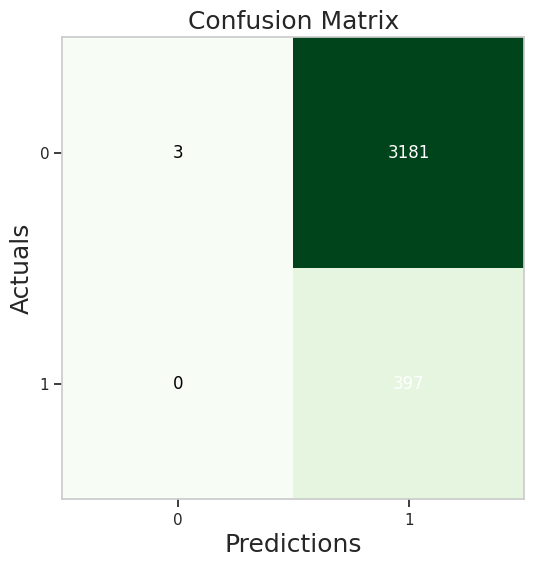

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(covid_label,covid_y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(covid_label,covid_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3184
           1       0.11      1.00      0.20       397

    accuracy                           0.11      3581
   macro avg       0.56      0.50      0.10      3581
weighted avg       0.90      0.11      0.02      3581

